### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

### Loading datasets

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
IDtest = test_df["PassengerId"]
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [4]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
dataset = pd.concat(objs=[train_df, test_df],axis=0).reset_index(drop=True)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
dataset = dataset.fillna(np.nan)
dataset.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### Data Stats and Analysis

* Let us rely on the stats and stories unfolded from our data.
* Data analysis helps us to have an idea of important features, other probable contributing features, non-essential features etc.
* This ultimately helps to prepare our data so as to obtain best possible results in predictions.

In [7]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


* There are 7 columns of numeric data --> *PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare*.
* Rest 5 are of categorical data --> *Name, Sex, Ticket, Cabin, Embarked* 
* Non-Null count above suggests that there might be null values in the data.

In [9]:
print("Train set dimensions: ",train_df.shape)
train_df.nunique()

Train set dimensions:  (891, 12)


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

* There are 891 samples in the train data.
* There are 891 distinct values of *'PassengerId'* column. Thus the basic intuitive thought that it doesn't contribute anything to analysis, is confirmed statistically.
* Thus we may drop *'PassengerId'* column.
* Similarly, there are 891 distinct values of *'Name'* column.

In [10]:
train_df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

* Though the *'Name'* directly may not contribute to the analysis, we might engineer the column to extract features like 'Saluation', which might turn out to be useful in the analysis.

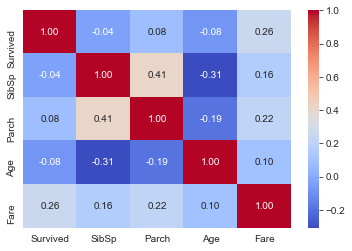

In [11]:
# Correlation matrix between numerical values and Survived 
g = sns.heatmap(train_df[["Survived","SibSp","Parch","Age","Fare"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")

* *Fare* appears to be somewhat correlated to the Survival probability.
* Let us dig deeper to find if any hidden insights would turn up.

In [12]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

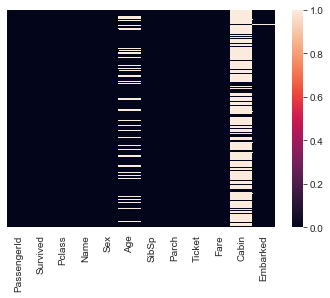

In [13]:
# visualizing the missing data

sns.heatmap(train_df.isnull(), yticklabels=False)

* *Age* and *Cabin* are apparently having missing data.
* *Cabin* has most of the data to be missing.

In [14]:
train_df.isnull().sum() * 100 / len(train_df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

* There are about 
    * 0.2% values to be missing *'Embarked'* column.
    * 20% values to be missing *'Age'* column. 
    * 80% values to be missing *'Cabin'* column.


#### Age

* Let us visualize the distribution of *Age* data.

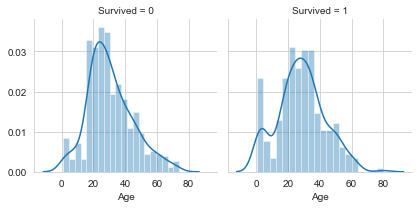

In [15]:
age_plot = sns.FacetGrid(train_df, col='Survived')
age_plot.map(sns.distplot, 'Age', bins=20)

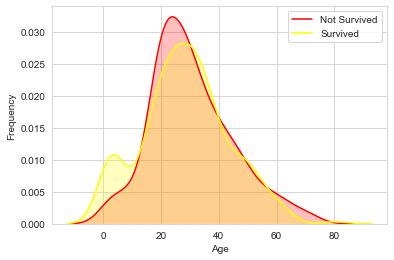

In [16]:
g = sns.kdeplot(train_df["Age"][(train_df["Survived"] == 0) & (train_df["Age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train_df["Age"][(train_df["Survived"] == 1) & (train_df["Age"].notnull())], ax =g, color="Yellow", shade = True)
g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Not Survived","Survived"])

* We could see a small peak for the younger(nearly of ages <15) ages to survive.
* From the correlation matrix of numerical data, it is evident that the age is not greatly correlated with the survival probability.
* But from the above plots of age, it is perceptible that subpopulation of age (children) have more chances of being survived.
* This is an interesting observation, and thus we should retain age in our data and impute the missing values.
* Let us further continue our data analysis.

#### Parch

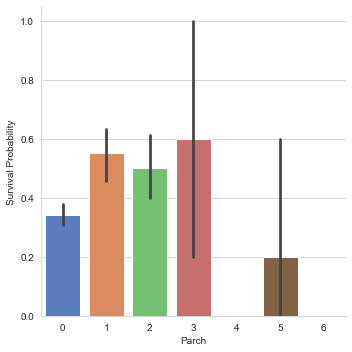

In [17]:
g  = sns.factorplot(x="Parch",y="Survived",data=train_df,kind="bar", size = 5, palette = "muted")
g = g.set_ylabels("Survival Probability")

* Medium sized families with size 1<=Parents/children<=3 had more chances of survival. Being short families they might have managed to rescue themselves well and fast.
* Nevertheless, families with 3 arents/children depict a high varibility of survaival.
* 0 parents/children had lesser chances of survival. This might have been so as they didn't have their own people to save them.
* Larger families with 4<=Parents/children<=6 had very poor rate of survival.

#### SibSp

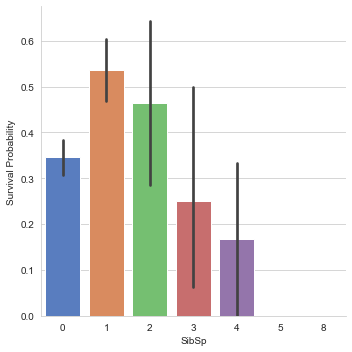

In [18]:
g  = sns.factorplot(x="SibSp",y="Survived",data=train_df,kind="bar", size = 5, palette = "muted")
g = g.set_ylabels("Survival Probability")

* People with 1 or 2 siblings/spouse  had greater chances of survival.
* Larger number of siblings/spouse had less chances of survival.

* Observing the above obtained insights from *SibSp* and *Parch* features:
    * we could make out that larger families might have had greater difficulties escaping from the danger and save themselves. 
    * So, I feel that it would be reasonable to combine these to features to makeout a new feature representing the family size as a whole.

#### Fare

In [19]:
dataset["Fare"].isnull().sum()

1

* Since *Fare* is a numerical column, let us impute the missing value with median.

In [20]:
dataset["Fare"] = dataset["Fare"].fillna(dataset["Fare"].median())
dataset["Fare"].isnull().sum()

0

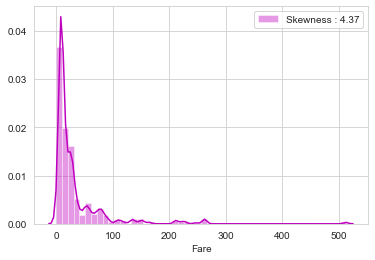

In [21]:
g = sns.distplot(dataset["Fare"], color="m", label="Skewness : %.2f"%(dataset["Fare"].skew()))
g = g.legend(loc="best")

* The *Fare* data is quite skewed, this might lead to overweighed impression of the feature in the modeling.
* Let us log-transform the data to reduce skewness.

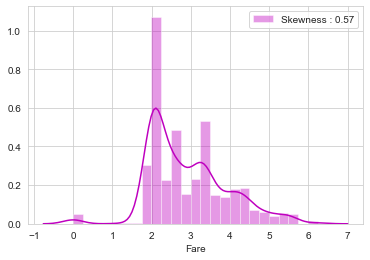

In [22]:
dataset["Fare"] = dataset["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

g = sns.distplot(dataset["Fare"], color="m", label="Skewness : %.2f"%(dataset["Fare"].skew()))
g = g.legend(loc="best")

* This chart depicts an obvious reduction in the skewness of the *Fare*.

#### Sex

In [23]:
dataset["Sex"].isnull().sum()

0

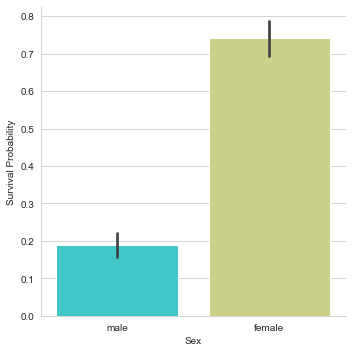

In [24]:
g  = sns.factorplot(x="Sex",y="Survived",data=train_df,kind="bar", size = 5, palette = "rainbow")
g = g.set_ylabels("Survival Probability")

* Females had quite a larger probability of survival as compared to males.

Text(0.5, 1.0, 'Male')

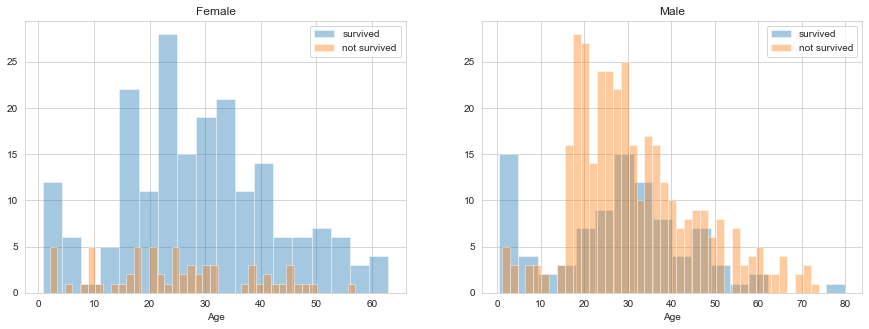

In [25]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
female = train_df[train_df['Sex']=='female']
male = train_df[train_df['Sex']=='male']

ax = sns.distplot(female[female['Survived']==1]['Age'].dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(female[female['Survived']==0]['Age'].dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(male[male['Survived']==1]['Age'].dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(male[male['Survived']==0]['Age'].dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

* The probability of survival is :
    * high in children
    * high in females of age around 15-42
    * males of age around 18-38 had higher rates of non-survival as compared to their survival probability. Whereas femlaes had very high chances of survival at this age group.
    * Thus age and sex are related to predict survival.

#### Pclass

In [26]:
dataset["Pclass"].isnull().sum()

0

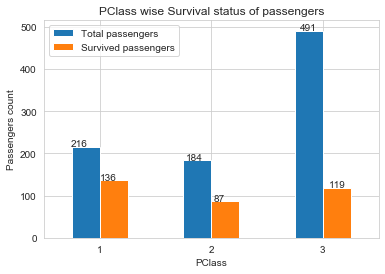

In [27]:
pclass_count = list(train_df['Pclass'].value_counts().sort_index())
survived_df = train_df[train_df.Survived==1]
survived_count = list(survived_df.Pclass.value_counts().sort_index())
index = sorted(train_df.Pclass.unique())
df = pd.DataFrame({'Total passengers':pclass_count,'Survived passengers':survived_count},index=index,columns=['Total passengers','Survived passengers'])
ax = df.plot.bar(rot=1)
ax.set_xlabel("PClass")
ax.set_ylabel("Passengers count")
ax.set_title("PClass wise Survival status of passengers")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.025, p.get_height() * 1.005))

* About 63% of *Pclass 1*, 47% of *Pclass 2* and 24% of *Pclass 3* are survived.
* So higher class people (socio-economically strong) have survived the most.

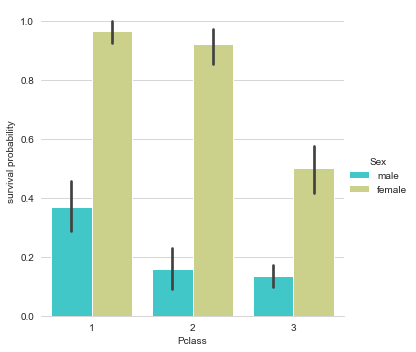

In [28]:
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=train_df,size=5, kind="bar", palette="rainbow")
g.despine(left=True)
g = g.set_ylabels("survival probability")

* Females of the three Pclasses has higher probability of survival when compared to males.

#### Embarked

In [29]:
dataset["Embarked"].isnull().sum()

2

* Since this is a categorical variable, let us impute the missing values with mode.

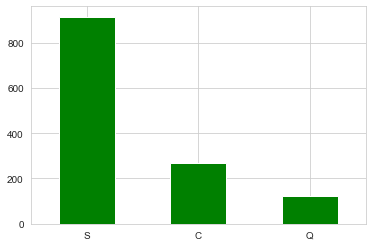

In [30]:
dataset["Embarked"].value_counts().plot(kind='bar', color='g', rot=0)

In [31]:
print(dataset["Embarked"].mode())
dataset["Embarked"] = dataset["Embarked"].fillna(dataset["Embarked"].mode()[0])
dataset["Embarked"].isnull().sum()

0    S
dtype: object


0

Text(0.5, 1.0, 'Survival probability based on the Embarked')

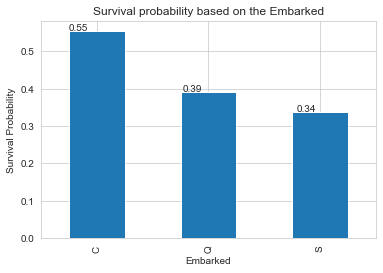

In [32]:
plt = train_df[['Embarked', 'Survived']].groupby('Embarked').mean().Survived.plot(kind='bar')
plt.set_xlabel('Embarked')
plt.set_ylabel('Survival Probability')
for p in plt.patches:
    plt.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.025, p.get_height() * 1.005))
plt.set_title("Survival probability based on the Embarked")

* The order of higher survival probability is C>Q~S.
* Thus the passengers from Cherbourg(C) had higher survival probability.

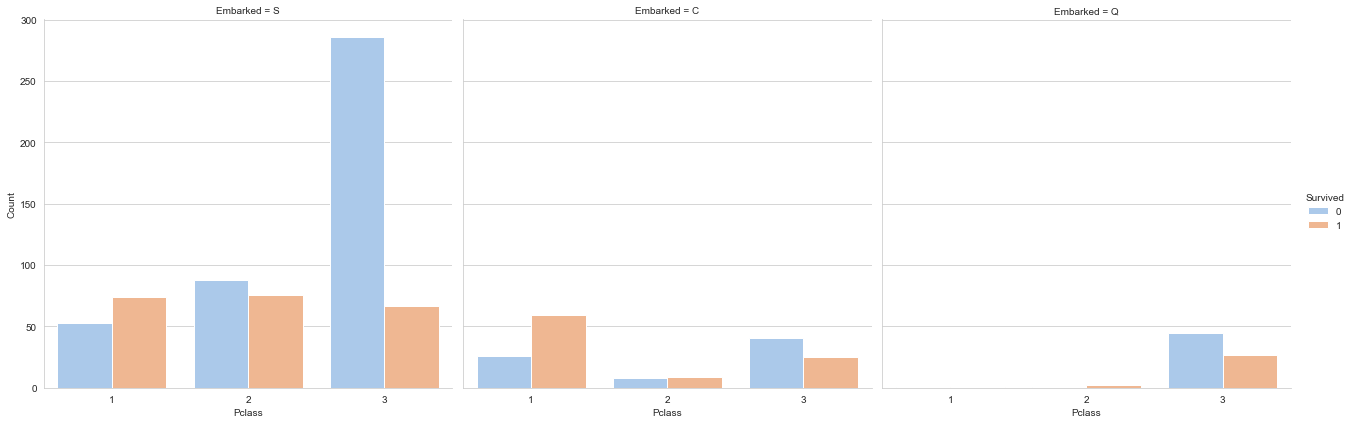

In [33]:
g = sns.factorplot("Pclass", col="Embarked",hue='Survived',  data=train_df, size=6, kind="count", palette="pastel")
g = g.set_ylabels("Count")

* As evident from both Pclass and Embarked, 
    * 1st class people had more survival probabilities than non.survival probabilities.
    * At port C, more people boarded into 1st class, conforming to the insight that the more people from C had survived.

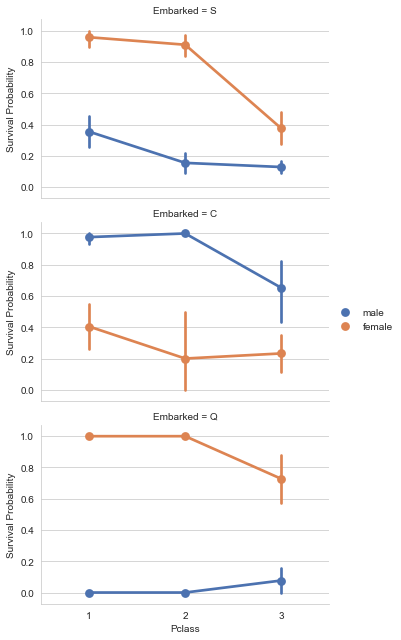

In [34]:
grid = sns.FacetGrid(train_df, row='Embarked', size=3, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.set_axis_labels(y_var="Survival Probability")
grid.add_legend()

* These plots point an exception where males had a higher probability of survival than females in Embarked=C.
* This might be due to the correlation between Embarked and Pclass, and in return that in between Pclass and Survived.

### Imputing Missing Data

#### Age

* Based on the observations made in the data analysis, let us try to find out the relation between Age vs Sex, Parch, SibSp and Pclass.

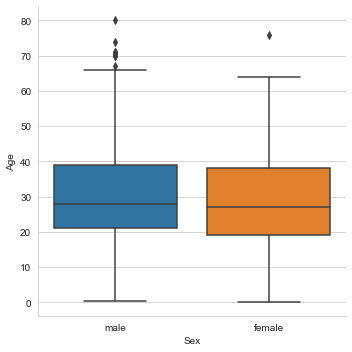

In [35]:
g = sns.factorplot(y="Age",x="Sex",data=dataset,kind="box")

* The *Age* distribution is apparently the same for both the sexes, thus *Sex* might not be useful to predict *Age*.

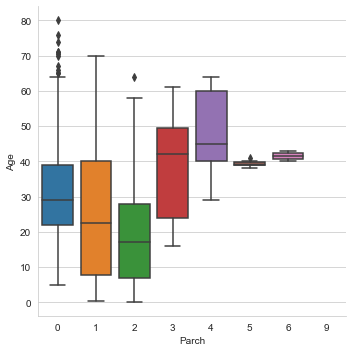

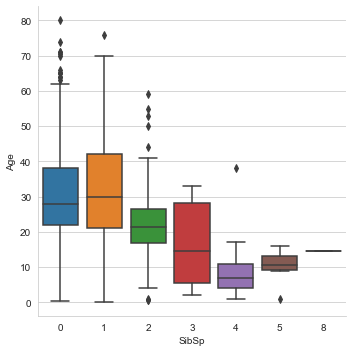

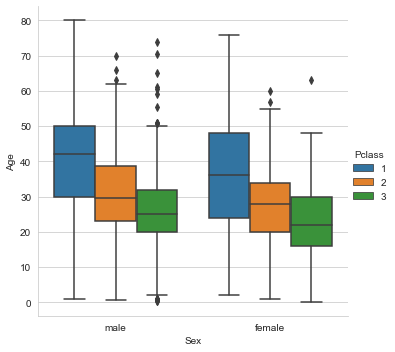

In [36]:
g = sns.factorplot(y="Age",x="Parch", data=dataset,kind="box")
g = sns.factorplot(y="Age",x="SibSp", data=dataset,kind="box")
g = sns.factorplot(y="Age",x="Sex",hue="Pclass", data=dataset,kind="box")

* With varying distributions of *Age* for each category of variables, these three features seem to be informative to predict *Age*.
* Let us cross-check our intuitions with a correlation map.

In [37]:
dataset["Sex"] = dataset["Sex"].map({"male": 0, "female":1})

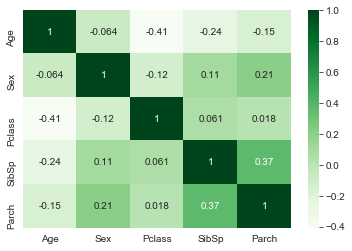

In [38]:
g = sns.heatmap(dataset[['Age','Sex','Pclass','SibSp','Parch']].corr(),cmap="Greens",annot=True)

* *Age* and *Sex* are not correlated.
* *Age* is negatively correlated with *Pclass*, *SibSp* and *Parch*.
* Let us consider *Pclass*, *SibSp* and *Parch* to impute missing *Age* values.

* Strategy to fill *Age* missing values:
    * Fill the missing age values with the median of age, if its corresponding values of *Pclass*, *SibSp* and *Parch* match.
    * Else, fill it with the median of *Age*.

In [39]:
#  get the indices of null Age values

age_Nan_indices = dataset['Age'][dataset['Age'].isnull()].index
age_Nan_indices = list(age_Nan_indices)
len(age_Nan_indices)

263

In [40]:
age_median = dataset['Age'].median()
for i in age_Nan_indices:
    age_pred = dataset['Age'][((dataset['Parch']==dataset['Parch'].iloc[i]) & (dataset['SibSp']==dataset['SibSp'].iloc[i]) & (dataset['Pclass']==dataset['Pclass'].iloc[i]))].median()
    if not np.isnan(age_pred):
        age = age_pred
    else:
        age = age_median
    dataset['Age'].iloc[i] = age

print(dataset['Age'].isnull().sum())

0


### Feature Engineering

#### Extract *Salutation* from *Name*

In [41]:
dataset["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [42]:
dataset["Name"].tail()

1304              Spector, Mr. Woolf
1305    Oliva y Ocana, Dona. Fermina
1306    Saether, Mr. Simon Sivertsen
1307             Ware, Mr. Frederick
1308        Peter, Master. Michael J
Name: Name, dtype: object

* If we observe, the names have "," and salutation is seperated by "."
* Let us split based on these.

In [43]:
salutation = [i.split(',')[1].strip().split('.')[0] for i in dataset['Name']]
dataset['Salutation'] = salutation
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,1.981001,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,4.266662,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,3.972177,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,2.085672,NaN,S,Mr


Text(0.5, 0, 'Salutation')

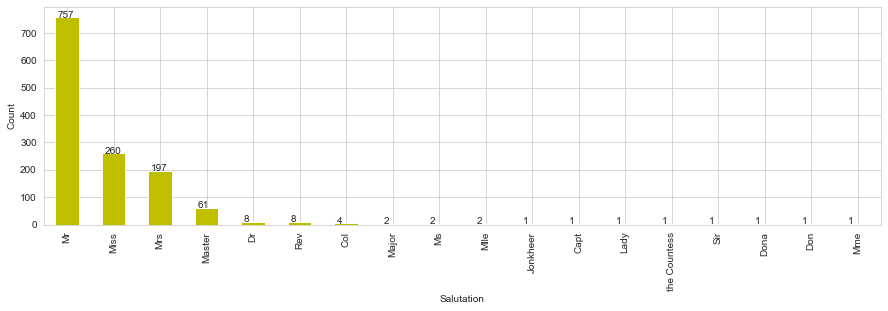

In [44]:
barplot = dataset["Salutation"].value_counts().plot(kind='bar', figsize=(15,4), color='y')
for bar in barplot.patches:
    yval = bar.get_height()
    barplot.text(bar.get_x()+(-0.2) + bar.get_width()/2.0, yval, int(yval))
    
barplot.set_ylabel("Count")
barplot.set_xlabel("Salutation")

* Let us group less frequent salutations together.

Text(0.5, 0, 'Salutation')

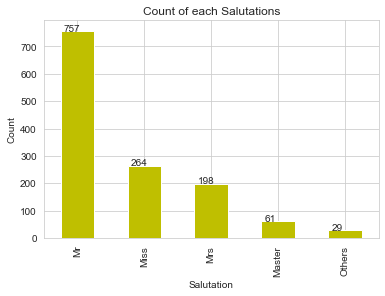

In [45]:
dataset['Salutation'] = dataset['Salutation'].replace(['Dr', 'Rev', 'Col', 'Major', 'the Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don','Dona'], 'Others')
dataset['Salutation'] = dataset['Salutation'].replace(['Mlle','Ms'], 'Miss')
dataset['Salutation'] = dataset['Salutation'].replace('Mme', 'Mrs')
barplot = dataset["Salutation"].value_counts().plot(kind='bar', color='y')
for bar in barplot.patches:
    yval = bar.get_height()
    barplot.text(bar.get_x()+(-0.2) + bar.get_width()/2.0, yval, int(yval))
barplot.set_title("Count of each Salutations")
barplot.set_ylabel("Count")
barplot.set_xlabel("Salutation")

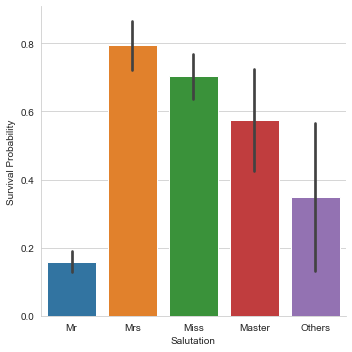

In [46]:
g = sns.factorplot(x="Salutation",y="Survived",data=dataset,kind="bar")
g.set_axis_labels(y_var='Survival Probability')

* Females and Male Children had greater probabilities of survival, followed by Others.

In [47]:
titles = {"Mr": 1, "Mrs": 2,"Miss": 3, "Master": 4, "Others": 5}
dataset['Salutation'] = dataset['Salutation'].map(titles)

dataset['Salutation'] = dataset['Salutation'].fillna(0)

In [48]:
dataset.drop(labels = ["Name"], axis = 1, inplace = True)

In [49]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation
0,1,0.0,3,0,22.0,1,0,A/5 21171,1.981001,NaN,S,1
1,2,1.0,1,1,38.0,1,0,PC 17599,4.266662,C85,C,2
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,3
3,4,1.0,1,1,35.0,1,0,113803,3.972177,C123,S,2
4,5,0.0,3,0,35.0,0,0,373450,2.085672,NaN,S,1


#### *Family Size*

* From the data analysis part, we concluded that it might be useful to combine Parch and SibSp, owing to our thought that larger families might have had difficulties escaping from the danger while waiting for their dear ones.
* So let us create a new feature Fsize representing the family size.

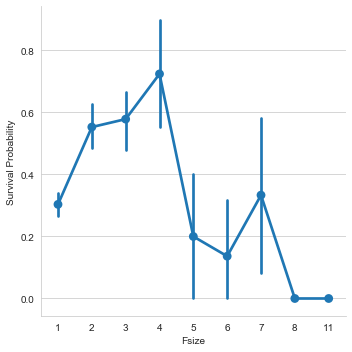

In [50]:
dataset['Fsize'] = dataset['Parch']+dataset['SibSp']+1
g = sns.factorplot(x="Fsize",y="Survived",data = dataset)
g = g.set_ylabels("Survival Probability")

* Individuals with no family and larger families had poor survival probabilities.

In [51]:
dataset.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Fsize
0,1,0.0,3,0,22.0,1,0,A/5 21171,1.981001,NaN,S,1,2
1,2,1.0,1,1,38.0,1,0,PC 17599,4.266662,C85,C,2,2
2,3,1.0,3,1,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,3,1
3,4,1.0,1,1,35.0,1,0,113803,3.972177,C123,S,2,2
4,5,0.0,3,0,35.0,0,0,373450,2.085672,NaN,S,1,1


#### Embarked

In [52]:
ports = {"S": 0, "C": 1, "Q": 2}

dataset['Embarked'] = dataset['Embarked'].map(ports)

#### Drop PassengerId

In [53]:
dataset.drop(labels = ["PassengerId"], axis = 1, inplace = True)

In [54]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Fsize
0,0.0,3,0,22.0,1,0,A/5 21171,1.981001,NaN,0,1,2
1,1.0,1,1,38.0,1,0,PC 17599,4.266662,C85,1,2,2
2,1.0,3,1,26.0,0,0,STON/O2. 3101282,2.070022,NaN,0,3,1
3,1.0,1,1,35.0,1,0,113803,3.972177,C123,0,2,2
4,0.0,3,0,35.0,0,0,373450,2.085672,NaN,0,1,1


#### Cabin

* Owing to a significant percentage of missing values for *Cabin*, I thought of removing the column.
* But I had a thought that having *Cabin* might have influenced the survival probability.
* Let us explore deeper about *Cabin*.

In [55]:
dataset["Cabin"].describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object

In [56]:
dataset["Cabin"][dataset["Cabin"].notnull()].head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

In [57]:
dataset["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in dataset['Cabin'] ])

In [58]:
dataset.Cabin.unique()

array(['X', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

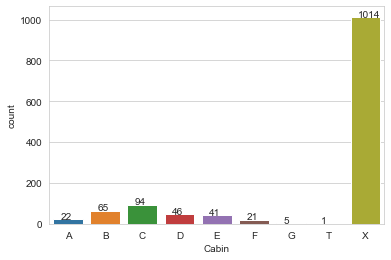

In [59]:
g = sns.countplot(dataset["Cabin"],order=['A','B','C','D','E','F','G','T','X'])
for bar in g.patches:
    yval = bar.get_height()
    g.text(bar.get_x()+(-0.2) + bar.get_width()/2.0, yval, int(yval))

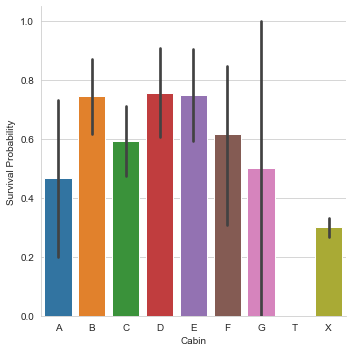

In [60]:
g = sns.factorplot(y="Survived",x="Cabin",data=dataset,kind="bar",order=['A','B','C','D','E','F','G','T','X'])
g = g.set_ylabels("Survival Probability")

* Thus it is evident that passengers without Cabin had the least probability of survival.
* Let us include the modified Cabins in the dataset.

In [61]:
cabin_series = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8, "X":9}
dataset['Cabin'] = dataset['Cabin'].map(cabin_series)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Fsize
0,0.0,3,0,22.0,1,0,A/5 21171,1.981001,9,0,1,2
1,1.0,1,1,38.0,1,0,PC 17599,4.266662,3,1,2,2
2,1.0,3,1,26.0,0,0,STON/O2. 3101282,2.070022,9,0,3,1
3,1.0,1,1,35.0,1,0,113803,3.972177,3,0,2,2
4,0.0,3,0,35.0,0,0,373450,2.085672,9,0,1,1


#### Ticket

In [62]:
dataset["Ticket"].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [63]:
dataset['Ticket'].isnull().sum()

0

In [64]:
Ticket = []
Ticket_List = list(dataset.Ticket)
for i, ticket in enumerate(Ticket_List):
    if not ticket.isdigit() :
        t = ticket.replace(".","").replace("/","").strip().split(' ')[0] 
    else:
        t = 'X'
    Ticket.append(t)
    dataset["Ticket"].iloc[i] = t

len(list(set(Ticket)))   

37

In [65]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Fsize
0,0.0,3,0,22.0,1,0,A5,1.981001,9,0,1,2
1,1.0,1,1,38.0,1,0,PC,4.266662,3,1,2,2
2,1.0,3,1,26.0,0,0,STONO2,2.070022,9,0,3,1
3,1.0,1,1,35.0,1,0,X,3.972177,3,0,2,2
4,0.0,3,0,35.0,0,0,X,2.085672,9,0,1,1


In [66]:
ticket_map = {}
value = 1
for i in set(Ticket):
    ticket_map[i]=value
    value+=1
len(ticket_map)

37

In [67]:
dataset['Ticket'] = dataset['Ticket'].map(ticket_map)
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Salutation,Fsize
0,0.0,3,0,22.0,1,0,11,1.981001,9,0,1,2
1,1.0,1,1,38.0,1,0,7,4.266662,3,1,2,2
2,1.0,3,1,26.0,0,0,17,2.070022,9,0,3,1
3,1.0,1,1,35.0,1,0,5,3.972177,3,0,2,2
4,0.0,3,0,35.0,0,0,5,2.085672,9,0,1,1


### Split Train and Test Data

In [68]:
train = dataset[:len(train_df)]
test = dataset[len(train_df):]
test.drop(labels = ["Survived"], axis = 1, inplace = True)
print(list(train.columns))
print(list(test.columns))

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Salutation', 'Fsize']
['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Salutation', 'Fsize']


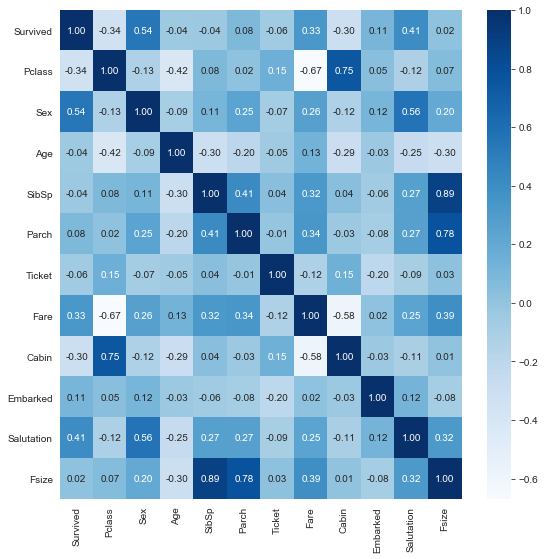

In [69]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(9,9))
g = sns.heatmap(train.corr(),annot=True, fmt = ".2f", cmap = "Blues", ax=axes)

* Not removing *Cabin* had been a good idea, as it negatively correlates with *Survival*.
* *Sex*, *Pclass*, *Fare* and *Salutation* had some impact in deciding the *Survival*.


In [70]:
train["Survived"] = train["Survived"].astype(int)
Y_train = train["Survived"]
X_train = train.drop(labels = ["Survived"],axis = 1)

print("X_train: ",X_train.shape)
print("Y_train ",Y_train.shape)
print("test ", test.shape)

X_train:  (891, 11)
Y_train  (891,)
test  (418, 11)


### Modeling

In [71]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [72]:
kfold = StratifiedKFold(n_splits=10)

In [73]:
random_state = 2
classifiers = []
classifiers.append(GaussianNB())
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))

In [74]:
def get_classifier_predictions(classifiers, X_train, Y_train,kfold):
    cv_results = []
    for classifier in classifiers :
        cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=-1))

    cv_means = []
    cv_std = []
    for cv_result in cv_results:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())
    return cv_results, cv_means, cv_std

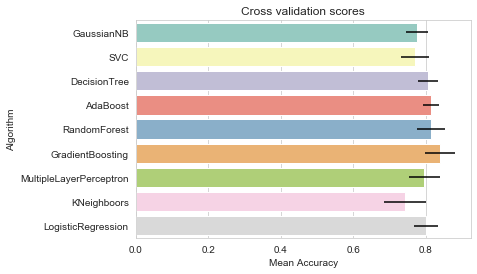

In [75]:

cv_results, cv_means, cv_std = get_classifier_predictions(classifiers, X_train, Y_train,kfold)
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["GaussianNB","SVC","DecisionTree","AdaBoost",
"RandomForest","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [76]:
cv_res = cv_res.reindex(['Algorithm','CrossValMeans','CrossValerrors'], axis=1).sort_values(by=['CrossValMeans'],ascending=False)
cv_res

,Algorithm,CrossValMeans,CrossValerrors
5,GradientBoosting,0.838411,0.041373
4,RandomForest,0.813728,0.038395
3,AdaBoost,0.813678,0.022673
2,DecisionTree,0.805926,0.028668
8,LogisticRegression,0.800220,0.032878
6,MultipleLayerPerceptron,0.795763,0.043016
0,GaussianNB,0.775600,0.029558
1,SVC,0.769919,0.039596
7,KNeighboors,0.743078,0.057136


#### Hyperparameter Tuning

In [77]:
# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsadaDTC.fit(X_train,Y_train)

ada_best = gsadaDTC.best_estimator_

Fitting 10 folds for each of 56 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed:    2.2s finished


In [78]:
gsadaDTC.best_score_

0.8125701459034792

In [91]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()

rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False,True],
              "n_estimators" :[100,300],
              "criterion": ["gini","entropy"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed: 11.0min finished


0.8406285072951739

In [92]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300,400],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': ['auto', None] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_


Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   50.7s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  2.1min finished


0.8282828282828283

In [93]:
gs_res = pd.DataFrame({"Algorithm":["AdaBoost","RandomForest","GradientBoosting"],"Best Score":[gsadaDTC.best_score_,gsRFC.best_score_,gsGBC.best_score_]})
gs_res = gs_res.sort_values(by=['Best Score'], ascending=False)
gs_res

,Algorithm,Best Score
1,RandomForest,0.840629
2,GradientBoosting,0.828283
0,AdaBoost,0.812570


In [94]:
from IPython.display import display_html 


df1 = cv_res.loc[cv_res['Algorithm'].isin(["AdaBoost","RandomForest","GradientBoosting"])][['Algorithm','CrossValMeans']].sort_values(by=['CrossValMeans'],ascending=False)
df2 = gs_res

df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Before Hyperparameter Tuning')
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('After Hyperparameter Tuning')

display_html(df1_styler._repr_html_()+'\t'+df2_styler._repr_html_(), raw=True)

,Algorithm,CrossValMeans
5,GradientBoosting,0.836151
4,RandomForest,0.821507
3,AdaBoost,0.813678
,Algorithm,Best Score
1,RandomForest,0.840629
2,GradientBoosting,0.828283
0,AdaBoost,0.812570


<!-- * We could observe very very small improvements in the best scores after hyperparameter tuning. -->


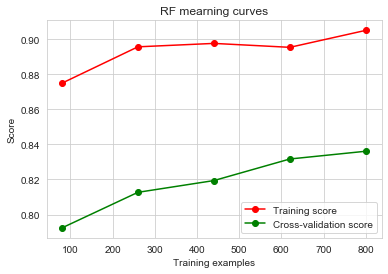

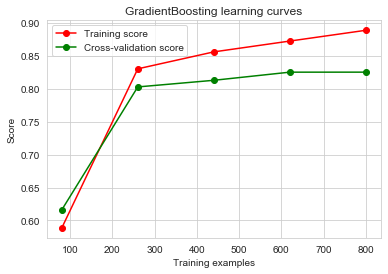

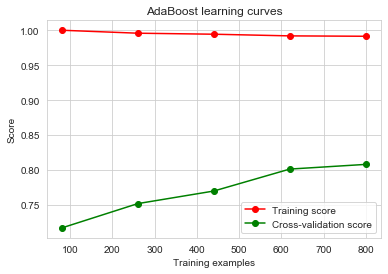

In [95]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid(True)

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)


* Adaboost seem to overfit the data, unlike Random Forest and Gradient Bossting.

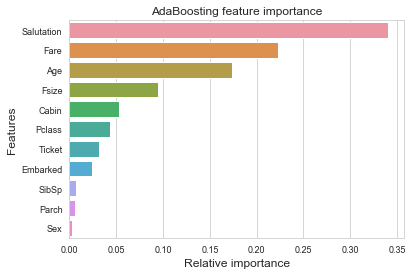

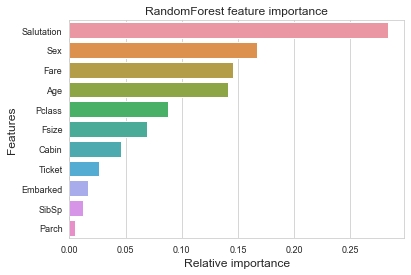

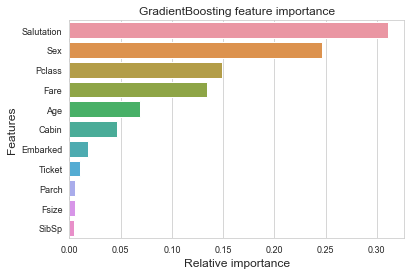

In [96]:
names_classifiers = [("AdaBoosting", ada_best),("RandomForest",RFC_best),("GradientBoosting",GBC_best)]
def get_feature_importance_plot(name_classifier, classifier):
        name = name_classifier
        indices = np.argsort(classifier.feature_importances_)[::-1][:40]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h')
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        plt.show(g)
    
g = get_feature_importance_plot(names_classifiers[0][0],names_classifiers[0][1])
g = get_feature_importance_plot(names_classifiers[1][0],names_classifiers[1][1])
g = get_feature_importance_plot(names_classifiers[2][0],names_classifiers[2][1])


* Features are not selected in the same fashion by all the classifiers.
* Columns obtained through feature engineering - like *Cabin*, *Salutation* - seem to be useful.

In [97]:
X_no_Parch = X_train.drop(labels = ["Parch"], axis=1)

Text(0.5, 1.0, 'Cross validation scores')

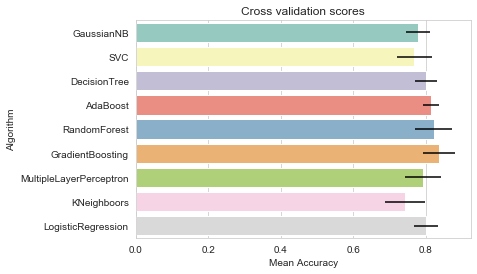

In [98]:
cv_results, cv_means, cv_std = get_classifier_predictions(classifiers, X_no_Parch, Y_train,kfold)
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["GaussianNB","SVC","DecisionTree","AdaBoost",
"RandomForest","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g.set_title("Cross validation scores")

In [99]:
cv_res = cv_res.reindex(['Algorithm','CrossValMeans','CrossValerrors'], axis=1).sort_values(by=['CrossValMeans'],ascending=False)
cv_res

,Algorithm,CrossValMeans,CrossValerrors
5,GradientBoosting,0.836151,0.043515
4,RandomForest,0.821507,0.050633
3,AdaBoost,0.813678,0.022673
2,DecisionTree,0.800295,0.029979
8,LogisticRegression,0.800220,0.032878
6,MultipleLayerPerceptron,0.792505,0.050370
0,GaussianNB,0.778984,0.033478
1,SVC,0.768808,0.047369
7,KNeighboors,0.743115,0.054421


* There has not been much impact upon removing *Parch*.

In [100]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best),('gbc',GBC_best)], voting='soft', n_jobs=-1)

votingC = votingC.fit(X_train, Y_train)

votingC.score(X_train, Y_train)

0.898989898989899

In [101]:
test_Survived = pd.Series(votingC.predict(test), name="Survived")

results = pd.concat([IDtest,test_Survived],axis=1)

results.to_csv("titanic_ensemble_predictions.csv",index=False)